# Predict H1N1 and Seasonal Flu Vaccines

## Overview
predict whether people got H1N1 and seasonal flu using information they shared about their backgrounds, opinions and behaviours


## Problem statement
The goal of this study is to predict  how likely individuals are to recieve their H1N1 and seasonal flu vaccines,whether individuals received the H1N1 and seasonal vaccines based on information about their backgrounds,opinions and health behaviours.
Understanding the factors influencing vaccination decisions can inform strategies to improve vaccine uptake in future public initiaves.
The study involves analyzing this survey data to uncover relationships between individual characteristics and vaccination patterns altimately develop predictive models to classify 

###

## Objectives
1. Predict vaccination status - Develop models to predict whether individuals recieved the H1N1 and seasonal flu
vaccines based on their demogrpahic,social and behavioral data
2. Identify key factors: Determine the most influential factors affecting vaccination decisions such as socioecnomic status, health behaviours or preceptions of vaccine effectiveness
3. Enhance public health insights -  Provide actionable insights to help public health officials design targeted campaigns to improve vaccine uptake.

## Python Data cleaning and Analysis

### 1a) Importing libraries

In [91]:
#importing Libraries we need
#common libraries
#import the pandas library
import pandas as pd
#import numpy library
import numpy as np
#import the seaborn library
import seaborn as sns
#import matplotlib library
import matplotlib.pyplot as plt

#one hot encoding libraries
from sklearn.preprocessing import OneHotEncoder

#Feature selection
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

#modelling
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

#Evaluation metrics
from sklearn.metrics import roc_curve,auc

### b)Reading datasets from our csv files

In [92]:
#Read data from the csv file and create dataframes we need
training_data = pd.read_csv('training_set_features.csv')
test_data = pd.read_csv('test_set_features.csv')
training_label =pd.read_csv('training_set_labels.csv')

### c)Previewing our datasets

In [93]:
#training dataset
training_data.head()

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb


In [94]:
training_label.head()

,respondent_id,h1n1_vaccine,seasonal_vaccine
0,0,0,0
1,1,0,1
2,2,0,0
3,3,0,1
4,4,0,0


In [95]:
test_data.head()

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
0,26707,2.0,2.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,"> $75,000",Not Married,Rent,Employed,mlyzmhmf,"MSA, Not Principle City",1.0,0.0,atmlpfrs,hfxkjkmi
1,26708,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,Below Poverty,Not Married,Rent,Employed,bhuqouqj,Non-MSA,3.0,0.0,atmlpfrs,xqwwgdyp
2,26709,2.0,2.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,...,"> $75,000",Married,Own,Employed,lrircsnp,Non-MSA,1.0,0.0,nduyfdeo,pvmttkik
3,26710,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,"<= $75,000, Above Poverty",Married,Own,Not in Labor Force,lrircsnp,"MSA, Not Principle City",1.0,0.0,NaN,NaN
4,26711,3.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,...,"<= $75,000, Above Poverty",Not Married,Own,Employed,lzgpxyit,Non-MSA,0.0,1.0,fcxhlnwr,mxkfnird


### d)Combine dataset 

In [96]:
#combine data with labels data that has the target features
data = pd.merge(training_data,training_label,how='inner',on='respondent_id')
data


,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation,h1n1_vaccine,seasonal_vaccine
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN,0,0
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe,0,1
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo,0,0
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN,0,1
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26702,26702,2.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,Own,Not in Labor Force,qufhixun,Non-MSA,0.0,0.0,NaN,NaN,0,0
26703,26703,1.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,Rent,Employed,lzgpxyit,"MSA, Principle City",1.0,0.0,fcxhlnwr,cmhcxjea,0,0
26704,26704,2.0,2.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,...,Own,NaN,lzgpxyit,"MSA, Not Principle City",0.0,0.0,NaN,NaN,0,1
26705,26705,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,...,Rent,Employed,lrircsnp,Non-MSA,1.0,0.0,fcxhlnwr,haliazsg,0,0


### d)Accessing information about our dataset

In [97]:
#getting to know about our dataset by accessing its information
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26707 entries, 0 to 26706
Data columns (total 38 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   respondent_id                26707 non-null  int64  
 1   h1n1_concern                 26615 non-null  float64
 2   h1n1_knowledge               26591 non-null  float64
 3   behavioral_antiviral_meds    26636 non-null  float64
 4   behavioral_avoidance         26499 non-null  float64
 5   behavioral_face_mask         26688 non-null  float64
 6   behavioral_wash_hands        26665 non-null  float64
 7   behavioral_large_gatherings  26620 non-null  float64
 8   behavioral_outside_home      26625 non-null  float64
 9   behavioral_touch_face        26579 non-null  float64
 10  doctor_recc_h1n1             24547 non-null  float64
 11  doctor_recc_seasonal         24547 non-null  float64
 12  chronic_med_condition        25736 non-null  float64
 13  child_under_6_mo

In [98]:
training_label.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   respondent_id     26707 non-null  int64
 1   h1n1_vaccine      26707 non-null  int64
 2   seasonal_vaccine  26707 non-null  int64
dtypes: int64(3)
memory usage: 626.1 KB


### e)Accessing Summary statistics about our data

In [99]:
# statistics for int and float objects
data.describe()

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,household_adults,household_children,h1n1_vaccine,seasonal_vaccine
count,26707.000000,26615.000000,26591.000000,26636.000000,26499.000000,26688.000000,26665.000000,26620.00000,26625.000000,26579.000000,...,26316.000000,26319.000000,26312.000000,26245.000000,26193.000000,26170.000000,26458.000000,26458.000000,26707.000000,26707.000000
mean,13353.000000,1.618486,1.262532,0.048844,0.725612,0.068982,0.825614,0.35864,0.337315,0.677264,...,3.850623,2.342566,2.357670,4.025986,2.719162,2.118112,0.886499,0.534583,0.212454,0.465608
std,7709.791156,0.910311,0.618149,0.215545,0.446214,0.253429,0.379448,0.47961,0.472802,0.467531,...,1.007436,1.285539,1.362766,1.086565,1.385055,1.332950,0.753422,0.928173,0.409052,0.498825
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,6676.500000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.00000,0.000000,0.000000,...,3.000000,1.000000,1.000000,4.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,13353.000000,2.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.00000,0.000000,1.000000,...,4.000000,2.000000,2.000000,4.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000
75%,20029.500000,2.000000,2.000000,0.000000,1.000000,0.000000,1.000000,1.00000,1.000000,1.000000,...,5.000000,4.000000,4.000000,5.000000,4.000000,4.000000,1.000000,1.000000,0.000000,1.000000
max,26706.000000,3.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,3.000000,3.000000,1.000000,1.000000


In [100]:
#statistics for float objects
data.describe(include='O')

,age_group,education,race,sex,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,employment_industry,employment_occupation
count,26707,25300,26707,26707,22284,25299,24665,25244,26707,26707,13377,13237
unique,5,4,4,2,3,2,2,3,10,3,21,23
top,65+ Years,College Graduate,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,lzgpxyit,"MSA, Not Principle City",fcxhlnwr,xtkaffoo
freq,6843,10097,21222,15858,12777,13555,18736,13560,4297,11645,2468,1778


## 2) Cleaning our Dataset
Perfoming data cleaning procedures below providing a documentation for our action and reaons.Will perform as many data cleaning procedures as we think suitable for the various dimensions of data

In [101]:
#lets do a copy of our dataset first
training = data.copy()
#preview first five rows
training.head()

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation,h1n1_vaccine,seasonal_vaccine
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN,0,0
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe,0,1
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo,0,0
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN,0,1
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb,0,0


### a)Check for missing values

In [102]:
#Check the sum of missing values per column
training.isna().sum()

respondent_id                      0
h1n1_concern                      92
h1n1_knowledge                   116
behavioral_antiviral_meds         71
behavioral_avoidance             208
behavioral_face_mask              19
behavioral_wash_hands             42
behavioral_large_gatherings       87
behavioral_outside_home           82
behavioral_touch_face            128
doctor_recc_h1n1                2160
doctor_recc_seasonal            2160
chronic_med_condition            971
child_under_6_months             820
health_worker                    804
health_insurance               12274
opinion_h1n1_vacc_effective      391
opinion_h1n1_risk                388
opinion_h1n1_sick_from_vacc      395
opinion_seas_vacc_effective      462
opinion_seas_risk                514
opinion_seas_sick_from_vacc      537
age_group                          0
education                       1407
race                               0
sex                                0
income_poverty                  4423
m

In [103]:
#check missing by percentage
((training.isna().sum()/training.shape[0]) * 100).sort_values(ascending=False)

employment_occupation          50.436215
employment_industry            49.912008
health_insurance               45.957989
income_poverty                 16.561201
doctor_recc_h1n1                8.087767
doctor_recc_seasonal            8.087767
rent_or_own                     7.645936
employment_status               5.477965
marital_status                  5.272026
education                       5.268282
chronic_med_condition           3.635751
child_under_6_months            3.070356
health_worker                   3.010447
opinion_seas_sick_from_vacc     2.010709
opinion_seas_risk               1.924589
opinion_seas_vacc_effective     1.729884
opinion_h1n1_sick_from_vacc     1.479013
opinion_h1n1_vacc_effective     1.464036
opinion_h1n1_risk               1.452803
household_adults                0.932340
household_children              0.932340
behavioral_avoidance            0.778822
behavioral_touch_face           0.479275
h1n1_knowledge                  0.434343
h1n1_concern    

### Drop columns with 50 and above missing values

In [104]:
#calculate the percentage of null values per column
null_percentage = (training.isna().sum()/training.shape[0]) * 100
#identify columns with 50 + null values
columns_to_drop = null_percentage[null_percentage>49.9].index
print(f'columns_to_drop: {columns_to_drop}')
#Drop those columns from the dataframe
training.drop(columns=columns_to_drop,inplace=True)
#check missing values again
((training.isna().sum()/training.shape[0]) * 100).sort_values(ascending=False) # employment_industry and employment_occupation dropped

columns_to_drop: Index(['employment_industry', 'employment_occupation'], dtype='object')


health_insurance               45.957989
income_poverty                 16.561201
doctor_recc_h1n1                8.087767
doctor_recc_seasonal            8.087767
rent_or_own                     7.645936
employment_status               5.477965
marital_status                  5.272026
education                       5.268282
chronic_med_condition           3.635751
child_under_6_months            3.070356
health_worker                   3.010447
opinion_seas_sick_from_vacc     2.010709
opinion_seas_risk               1.924589
opinion_seas_vacc_effective     1.729884
opinion_h1n1_sick_from_vacc     1.479013
opinion_h1n1_vacc_effective     1.464036
opinion_h1n1_risk               1.452803
household_adults                0.932340
household_children              0.932340
behavioral_avoidance            0.778822
behavioral_touch_face           0.479275
h1n1_knowledge                  0.434343
h1n1_concern                    0.344479
behavioral_large_gatherings     0.325757
behavioral_outsi

### Deciding  how to fill missing values

In [105]:
#fill numerics with median and categorical with mode
for column in training.columns:
    if training[column].dtype=='object':
        training[column].fillna(training[column].mode()[0],inplace=True)
    elif training[column].dtype =='float64':
        training[column].fillna(training[column].median(),inplace=True)

In [106]:
#techeck misssing 
training.isna().sum()

respondent_id                  0
h1n1_concern                   0
h1n1_knowledge                 0
behavioral_antiviral_meds      0
behavioral_avoidance           0
behavioral_face_mask           0
behavioral_wash_hands          0
behavioral_large_gatherings    0
behavioral_outside_home        0
behavioral_touch_face          0
doctor_recc_h1n1               0
doctor_recc_seasonal           0
chronic_med_condition          0
child_under_6_months           0
health_worker                  0
health_insurance               0
opinion_h1n1_vacc_effective    0
opinion_h1n1_risk              0
opinion_h1n1_sick_from_vacc    0
opinion_seas_vacc_effective    0
opinion_seas_risk              0
opinion_seas_sick_from_vacc    0
age_group                      0
education                      0
race                           0
sex                            0
income_poverty                 0
marital_status                 0
rent_or_own                    0
employment_status              0
hhs_geo_re

### b)Check for duplicates

In [107]:
training.duplicated().sum() #They are no duplicates in our dataset

0

### c)Remove unnecessary  columns


In [108]:
# hhs_geo_region,household_children,household_adults does not give much info on the likelihood to receive the vaccines
training.drop(columns=['hhs_geo_region','household_children','household_adults'],inplace=True)


### c)employment_status column 

In [109]:
### combine not in labour with unemployed in employment_status column
training.replace('Not in Labor Force','Unemployed',inplace=True)

## 3)EDA and Analysis

In [110]:
training.columns

Index(['respondent_id', 'h1n1_concern', 'h1n1_knowledge',
       'behavioral_antiviral_meds', 'behavioral_avoidance',
       'behavioral_face_mask', 'behavioral_wash_hands',
       'behavioral_large_gatherings', 'behavioral_outside_home',
       'behavioral_touch_face', 'doctor_recc_h1n1', 'doctor_recc_seasonal',
       'chronic_med_condition', 'child_under_6_months', 'health_worker',
       'health_insurance', 'opinion_h1n1_vacc_effective', 'opinion_h1n1_risk',
       'opinion_h1n1_sick_from_vacc', 'opinion_seas_vacc_effective',
       'opinion_seas_risk', 'opinion_seas_sick_from_vacc', 'age_group',
       'education', 'race', 'sex', 'income_poverty', 'marital_status',
       'rent_or_own', 'employment_status', 'census_msa', 'h1n1_vaccine',
       'seasonal_vaccine'],
      dtype='object')

In [111]:
# create functionsfor countplot and value counts to prevent repetition

#countplot
def countplot(x,y):
    fig,ax = plt.subplots(figsize=(12,8))
    sns.countplot(data=training,x=x)
    if y=='H1N1':
        ax.set(xlabel=x,title=f'{x} in H1N1')
    else:
        ax.set(xlabel=x,title=f'{x} in Seasonal flu')

#value_counts
def value_counts(x):
    return training[x].value_counts(normalize=True)

### 1)h1n1_concern

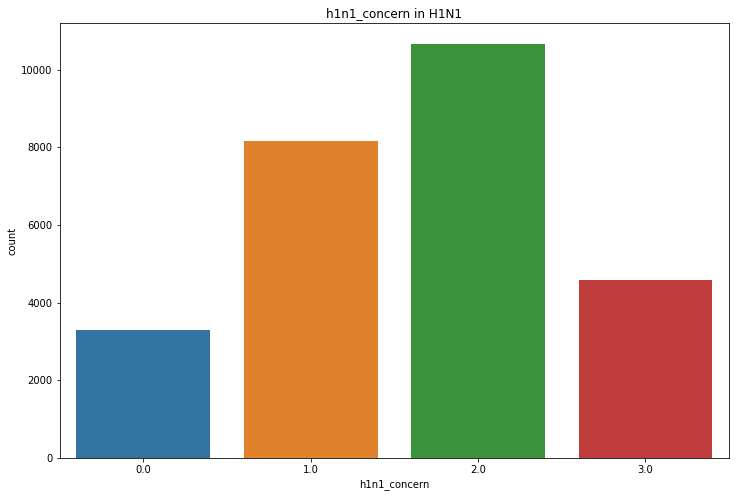

In [112]:
#create a function for countplot to prevent repetition to draw countplots for various variables

#h1n1_concern
countplot('h1n1_concern','H1N1')

In [113]:
value_counts('h1n1_concern')

2.0    0.399408
1.0    0.305276
3.0    0.171902
0.0    0.123413
Name: h1n1_concern, dtype: float64

### `most people are somewhat concerned with HINI vaccine`

### 2)h1n1_knowledge

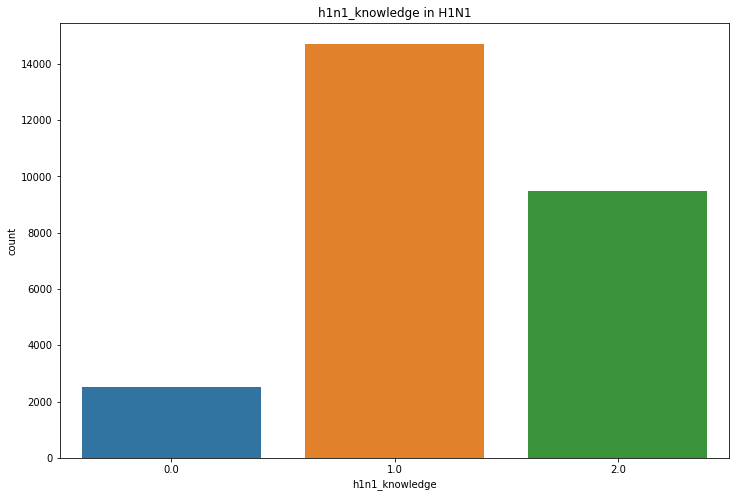

In [114]:
countplot('h1n1_knowledge','H1N1')

In [115]:
value_counts('h1n1_knowledge')

1.0    0.550942
2.0    0.355225
0.0    0.093833
Name: h1n1_knowledge, dtype: float64

### `most people have little knowledge on the HINI vaccine`

### 3) behavioral_antiviral_meds

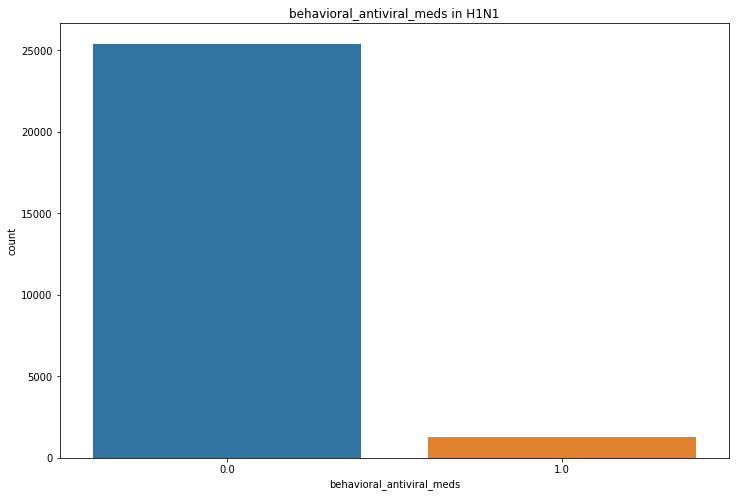

In [116]:
countplot('behavioral_antiviral_meds','H1N1')

In [117]:
value_counts('behavioral_antiviral_meds')

0.0    0.951286
1.0    0.048714
Name: behavioral_antiviral_meds, dtype: float64

### `More that 95% of people have not taken antiviral meds`

### 4)behavioral_face_mask

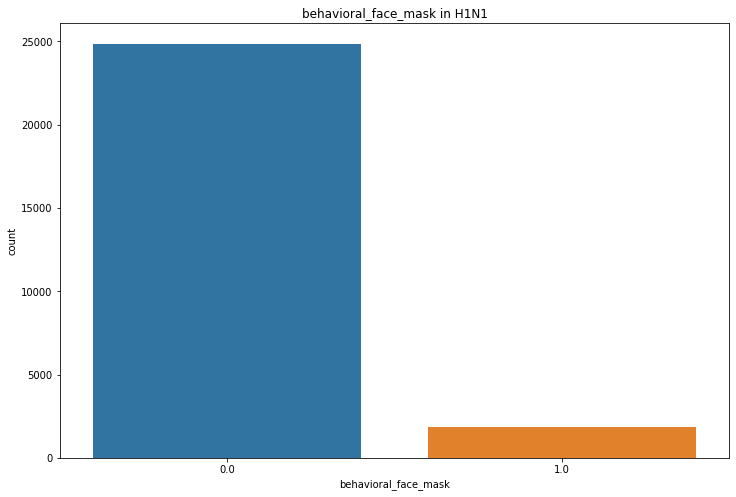

In [118]:
countplot('behavioral_face_mask','H1N1')

In [119]:
value_counts('behavioral_face_mask')

0.0    0.931067
1.0    0.068933
Name: behavioral_face_mask, dtype: float64

### `More than 93 % of people do not wear face mask`

### 

### 5)behavioral_wash_hands

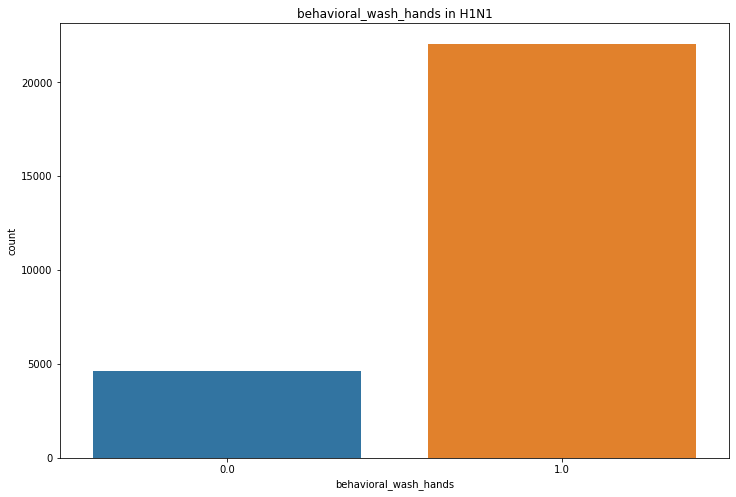

In [120]:
countplot('behavioral_wash_hands','H1N1')

In [121]:
value_counts('behavioral_wash_hands')

1.0    0.825888
0.0    0.174112
Name: behavioral_wash_hands, dtype: float64

### `most people(83%) wash hands`

### 6)behavioral_large_gatherings

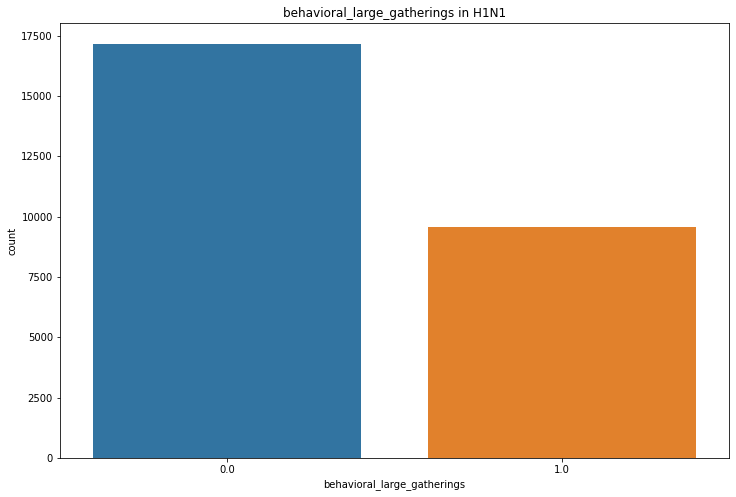

In [122]:
countplot('behavioral_large_gatherings','H1N1')

In [123]:
value_counts('behavioral_large_gatherings')

0.0    0.642528
1.0    0.357472
Name: behavioral_large_gatherings, dtype: float64

### `most people have not  reduced time at large gatherings`

### 7)behavioral_outside_home

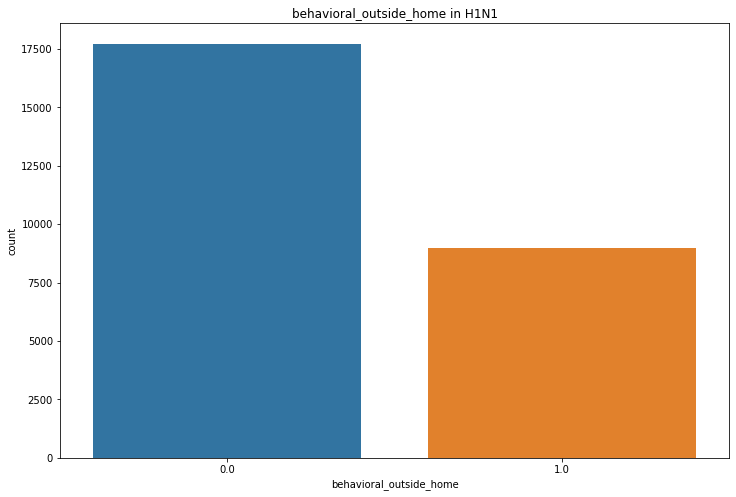

In [124]:
countplot('behavioral_outside_home','H1N1')

In [125]:
value_counts('behavioral_outside_home')

0.0    0.663721
1.0    0.336279
Name: behavioral_outside_home, dtype: float64

### `most people have not reduced contact with people outside their own household`

### 8)behavioral_touch_face

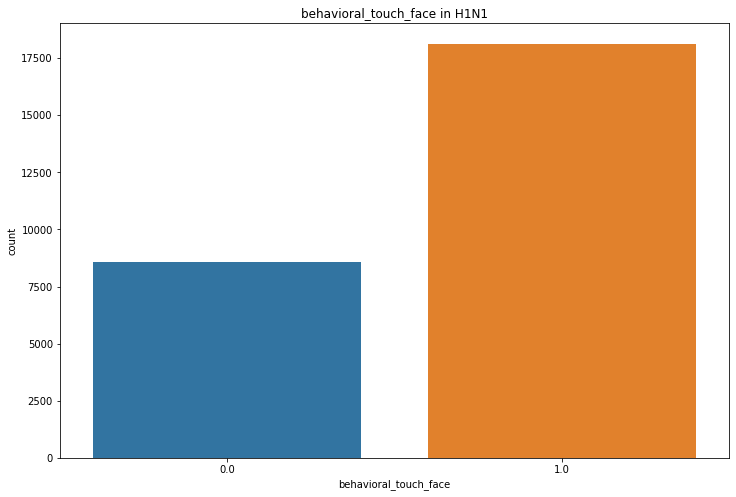

In [126]:
countplot('behavioral_touch_face','H1N1')

In [127]:
value_counts('behavioral_touch_face')

1.0    0.678811
0.0    0.321189
Name: behavioral_touch_face, dtype: float64

### `most people have avoided touching eyes,nose and mouth`

### 9) doctor_recc_h1n1

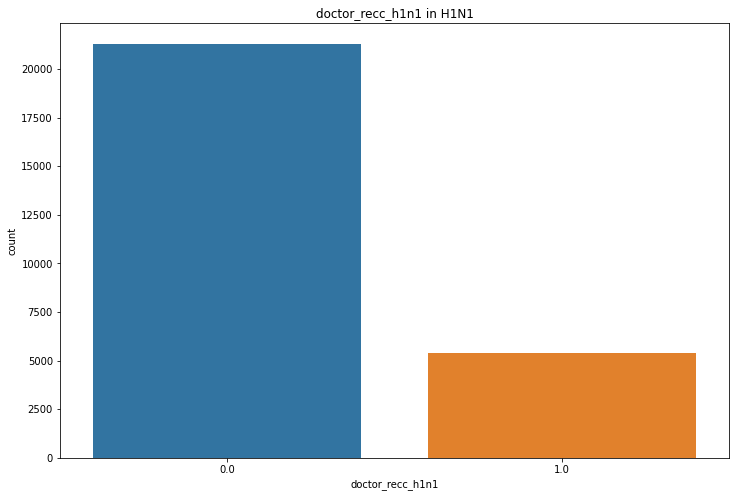

In [128]:
countplot('doctor_recc_h1n1','H1N1')

In [129]:
value_counts('doctor_recc_h1n1')

0.0    0.797506
1.0    0.202494
Name: doctor_recc_h1n1, dtype: float64

### `Most people had not been recommended the H1N1 vaccine by a doctor`

### 10)doctor_recc_seasonal

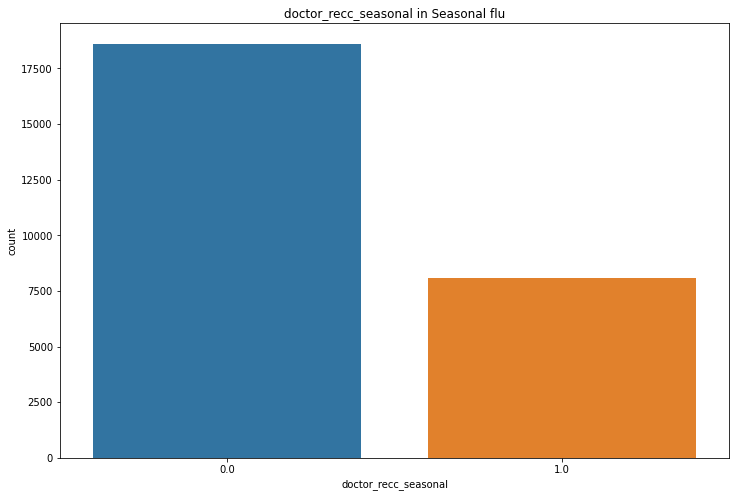

In [130]:
countplot('doctor_recc_seasonal','seasonal')

In [131]:
value_counts('doctor_recc_seasonal')

0.0    0.696933
1.0    0.303067
Name: doctor_recc_seasonal, dtype: float64

### `most people had not been recommended seasonal flu vaccine by a doctor`

### 11 chronic_med_condition

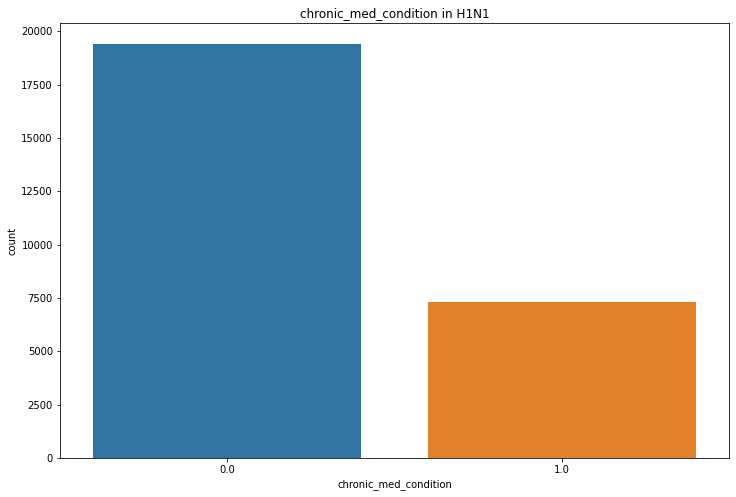

In [132]:

countplot('chronic_med_condition','H1N1')

In [133]:
value_counts('chronic_med_condition')

0.0    0.727038
1.0    0.272962
Name: chronic_med_condition, dtype: float64

### `most people do not have chronic illness`

### 12. child_under_6_months

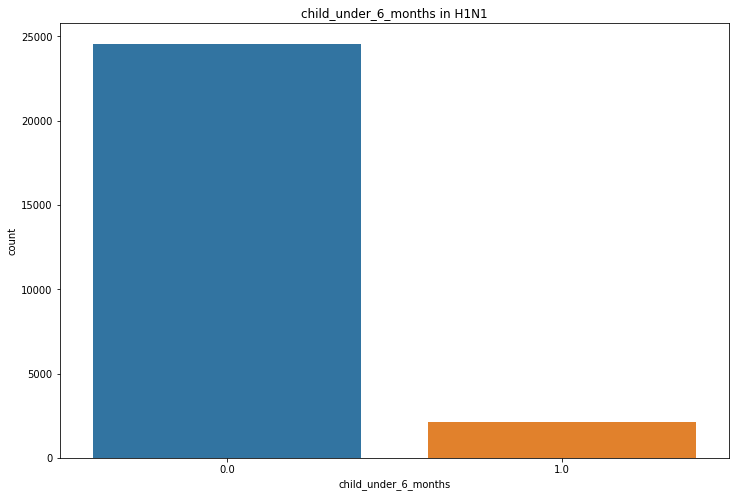

In [134]:
countplot('child_under_6_months','H1N1')

In [135]:
value_counts('child_under_6_months')

0.0    0.919946
1.0    0.080054
Name: child_under_6_months, dtype: float64

### `most peopple (91%)do not  have regular contact with children under 6 months only 9% have contact`

### 13. health_worker

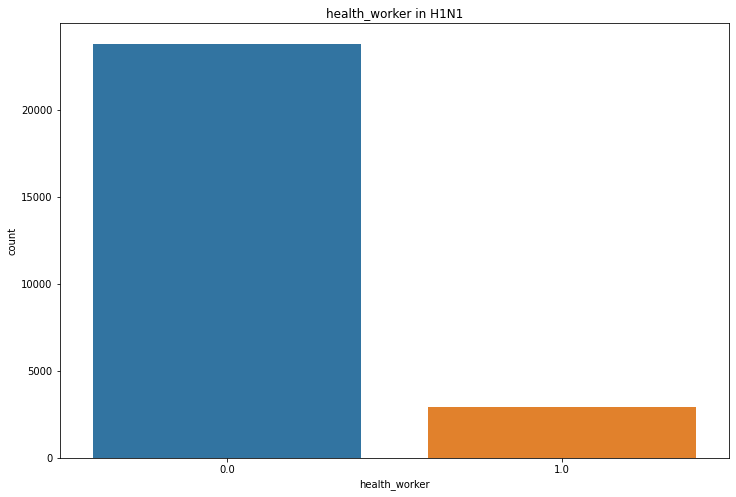

In [136]:
countplot('health_worker','H1N1')

In [137]:
value_counts('health_worker')

0.0    0.891452
1.0    0.108548
Name: health_worker, dtype: float64

### `most people are not health care workers`

### 14. health_insurance

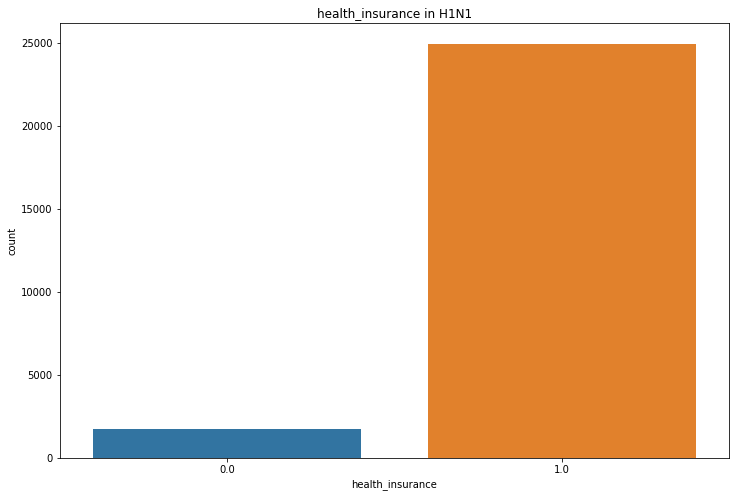

In [138]:
countplot('health_insurance','H1N1')

In [139]:
value_counts('health_insurance')

1.0    0.934998
0.0    0.065002
Name: health_insurance, dtype: float64

### `most people(93%)  have health insurance`


### 15. opinion_h1n1_vacc_effective

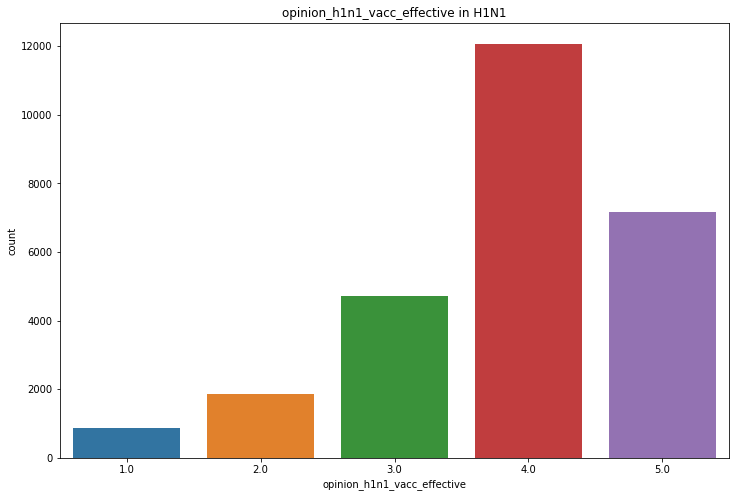

In [140]:
countplot('opinion_h1n1_vacc_effective','H1N1')

In [141]:
value_counts('opinion_h1n1_vacc_effective')

4.0    0.452091
5.0    0.268319
3.0    0.176845
2.0    0.069570
1.0    0.033175
Name: opinion_h1n1_vacc_effective, dtype: float64

### `most people believe that h1n1 vaccine is somewhat effective`

### 16. opinion_h1n1_risk

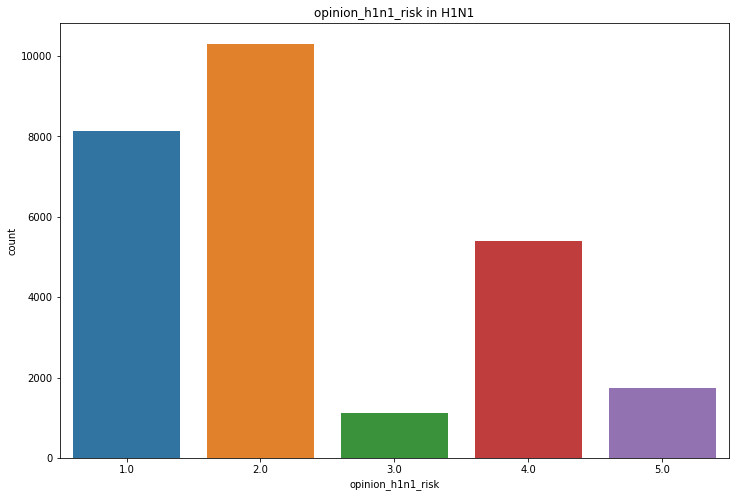

In [142]:
countplot('opinion_h1n1_risk','H1N1')

In [143]:
value_counts('opinion_h1n1_risk')

2.0    0.385929
1.0    0.304752
4.0    0.201970
5.0    0.065526
3.0    0.041824
Name: opinion_h1n1_risk, dtype: float64

### `most people believe that the risk of getting sick with H1N1 flu without vaccine is low`

### 17. opinion_h1n1_sick_from_vacc

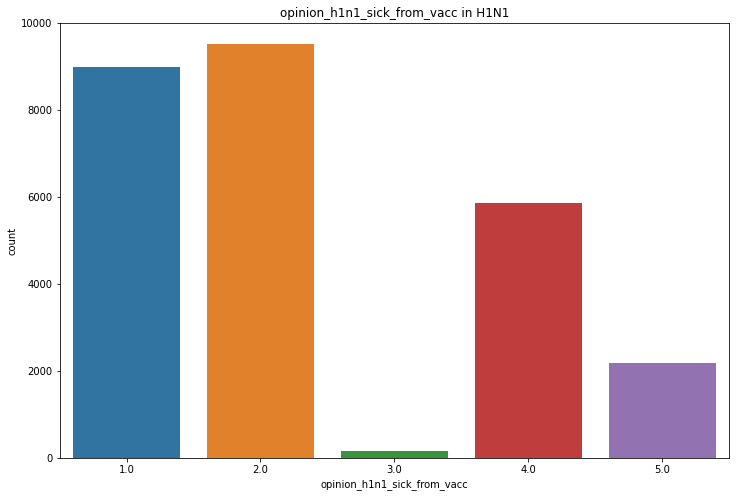

In [144]:
countplot('opinion_h1n1_sick_from_vacc','H1N1')

In [145]:
value_counts('opinion_h1n1_sick_from_vacc')

2.0    0.356611
1.0    0.336915
4.0    0.219044
5.0    0.081889
3.0    0.005542
Name: opinion_h1n1_sick_from_vacc, dtype: float64

### `most people are not very worried of getting sick from taking H1N1 vaccine`

### 18. opinion_seas_vacc_effective

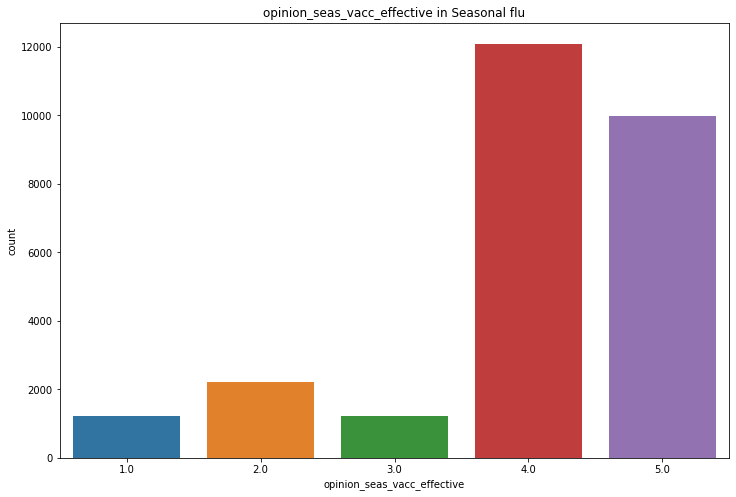

In [146]:
countplot('opinion_seas_vacc_effective','seasonal')

In [147]:
value_counts('opinion_seas_vacc_effective')

4.0    0.452728
5.0    0.373423
2.0    0.082600
1.0    0.045718
3.0    0.045531
Name: opinion_seas_vacc_effective, dtype: float64

### `most people believe that Seasonal flu vaccine is somewhat effective`

### 19. opinion_seas_risk

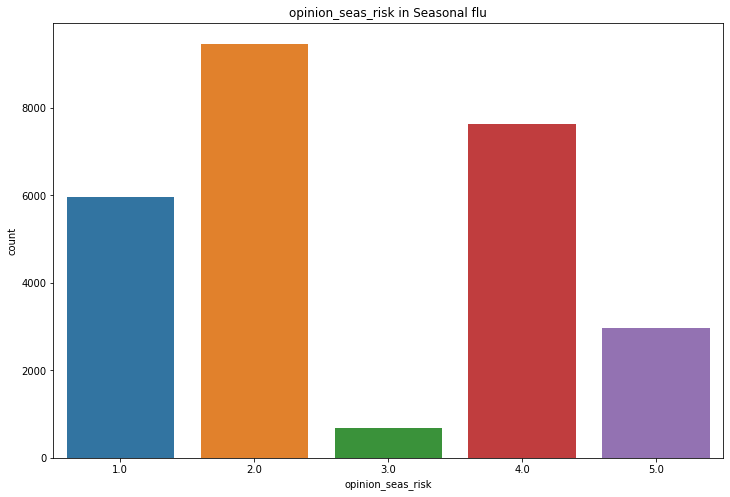

In [148]:
countplot('opinion_seas_risk','seasonal')

In [149]:
value_counts('opinion_seas_risk')

2.0    0.354514
4.0    0.285693
1.0    0.223687
5.0    0.110757
3.0    0.025349
Name: opinion_seas_risk, dtype: float64

### `most people believe that the risk of getting sick with seasonal flu without vaccine is somewhat low`

### 20. opinion_seas_sick_from_vacc

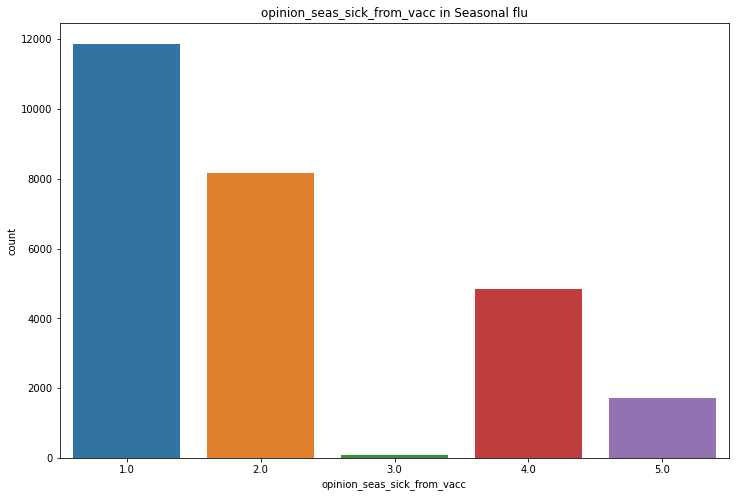

In [150]:
countplot('opinion_seas_sick_from_vacc','seasonal')

In [151]:
value_counts('opinion_seas_sick_from_vacc')

1.0    0.444453
2.0    0.305912
4.0    0.181675
5.0    0.064440
3.0    0.003520
Name: opinion_seas_sick_from_vacc, dtype: float64

### `most people are not worried at all from getting sick on taking the seasonal flu vaccine`

### 21. age_group

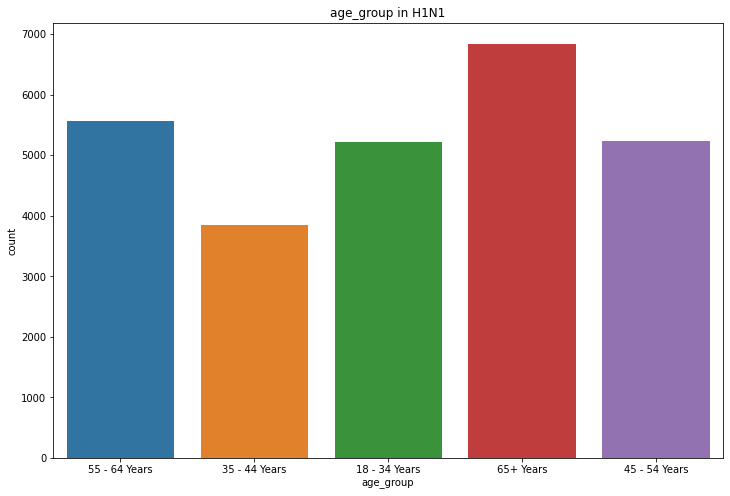

In [152]:
countplot('age_group','H1N1')

In [153]:
value_counts('age_group')

65+ Years        0.256225
55 - 64 Years    0.208297
45 - 54 Years    0.196128
18 - 34 Years    0.195267
35 - 44 Years    0.144082
Name: age_group, dtype: float64

### `most Respodents who answered are 55 years and above `

### 22.education

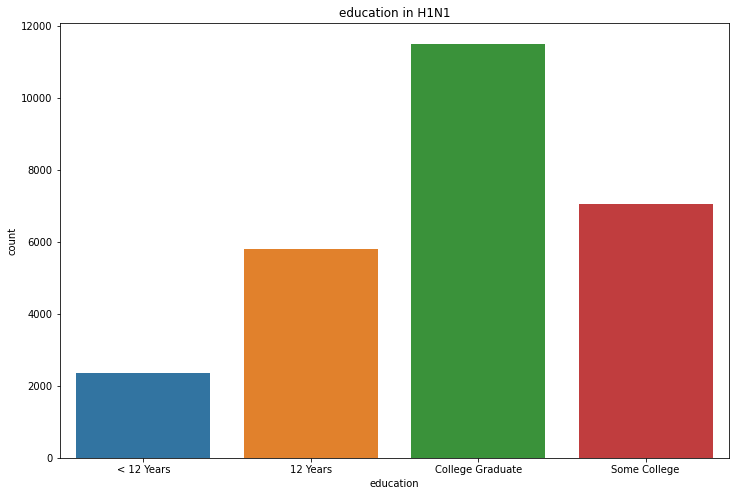

In [154]:
countplot('education','H1N1')

In [155]:
value_counts('education')

College Graduate    0.430748
Some College        0.263714
12 Years            0.217059
< 12 Years          0.088479
Name: education, dtype: float64

### `Most respodents reported to be college graduates`

### 23. race

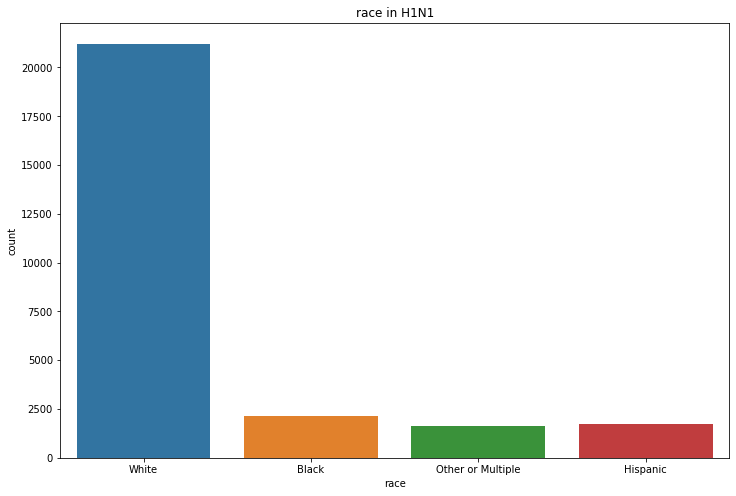

In [156]:
countplot('race','H1N1')

In [157]:
value_counts('race')

White                0.794623
Black                0.079305
Hispanic             0.065713
Other or Multiple    0.060359
Name: race, dtype: float64

### `Most respodents are white`

### 24. sex

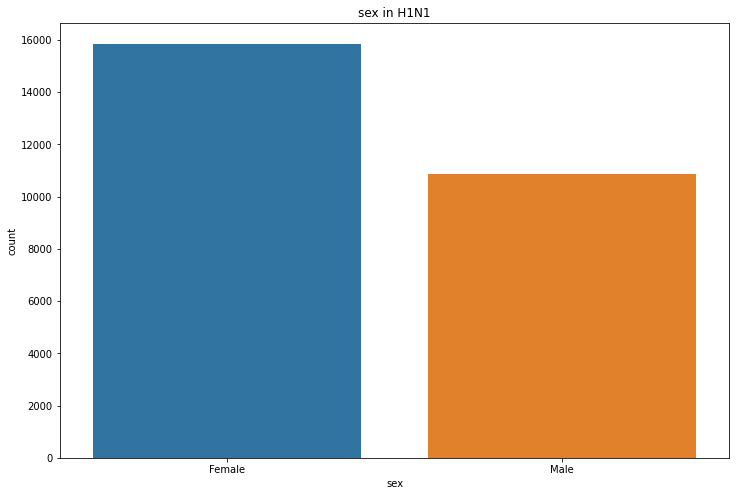

In [158]:
countplot('sex','H1N1')

In [159]:
value_counts('sex')

Female    0.593777
Male      0.406223
Name: sex, dtype: float64

### `Most respodents are females`

### 25. income_poverty

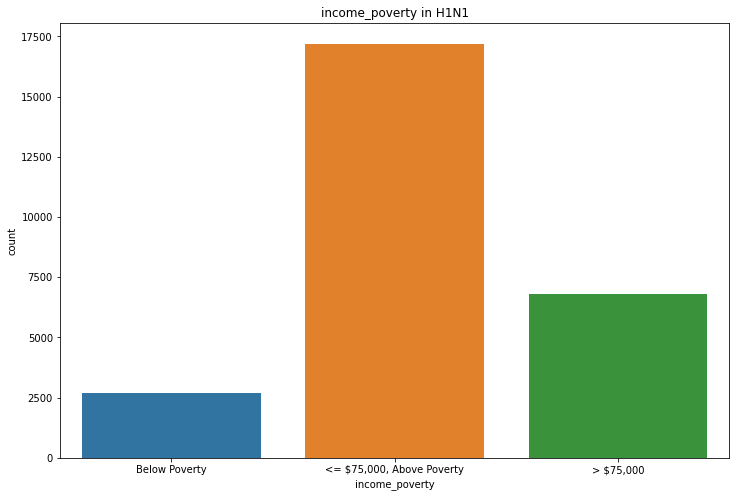

In [160]:
countplot('income_poverty','H1N1')

In [161]:
value_counts('income_poverty')

<= $75,000, Above Poverty    0.644026
> $75,000                    0.254989
Below Poverty                0.100985
Name: income_poverty, dtype: float64

### `Most respodents are above poverty that is with $75000 and below`

### 26. marital_status

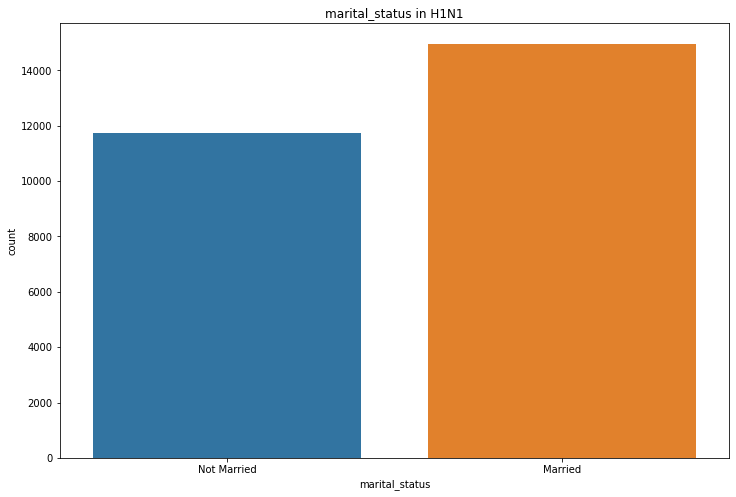

In [162]:
countplot('marital_status','H1N1')

In [163]:
value_counts('marital_status')

Married        0.560265
Not Married    0.439735
Name: marital_status, dtype: float64

### `most respodents are married`

27. rent_or_own

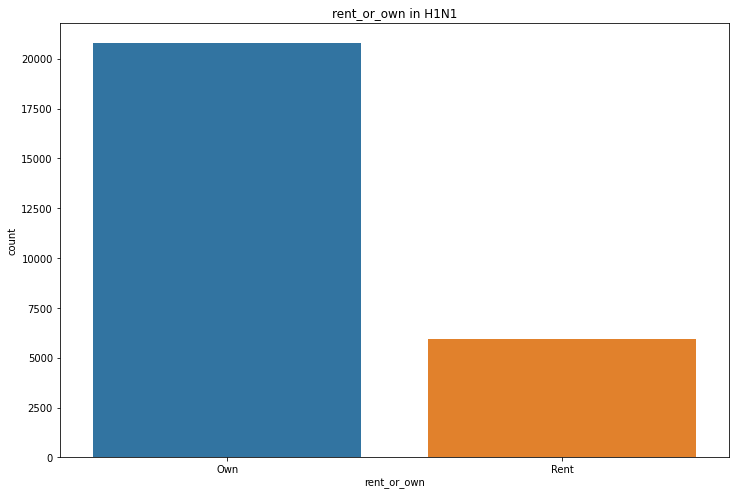

In [164]:
countplot('rent_or_own','H1N1')

In [165]:
value_counts('rent_or_own')

Own     0.777998
Rent    0.222002
Name: rent_or_own, dtype: float64

### `most respodents own houses`

### 28.employment_status

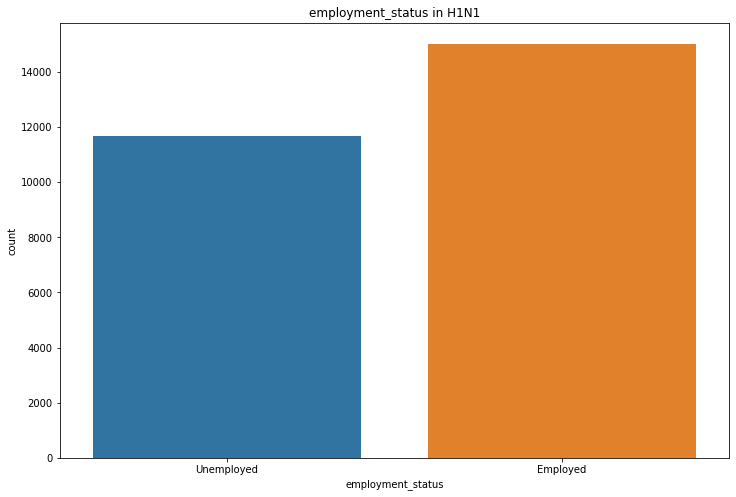

In [166]:
countplot('employment_status','H1N1')

In [167]:
value_counts('employment_status')

Employed      0.562512
Unemployed    0.437488
Name: employment_status, dtype: float64

### `Most respodents are employed`

### 29 census_msa

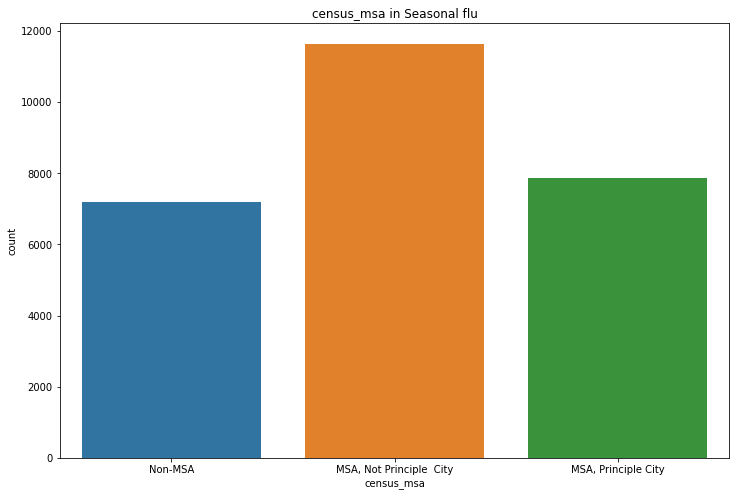

In [168]:
countplot('census_msa','H1NI')

In [169]:
value_counts('census_msa')

MSA, Not Principle  City    0.436028
MSA, Principle City         0.294455
Non-MSA                     0.269517
Name: census_msa, dtype: float64

### `most people not from MSA(metropolitan  statistical area)`

### 30.h1n1_vaccine

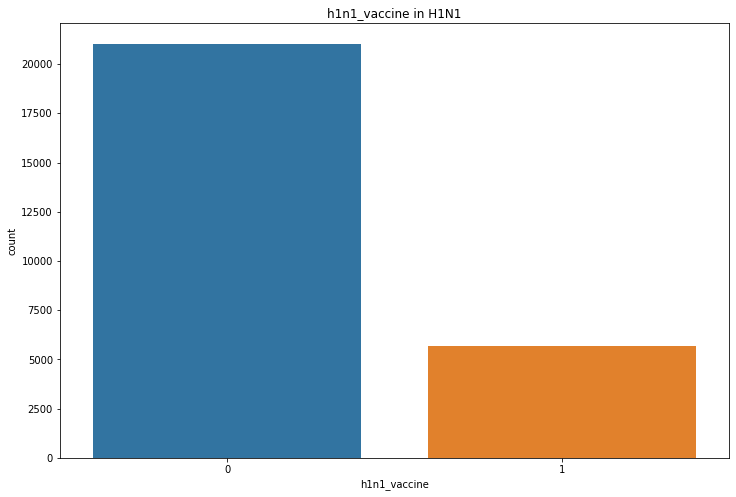

In [170]:
countplot('h1n1_vaccine','H1N1')

In [171]:
value_counts('h1n1_vaccine')

0    0.787546
1    0.212454
Name: h1n1_vaccine, dtype: float64

### `Most respodents(78%) did not receive the H1N1 vaccine`

#### 31.seasonal_vaccine

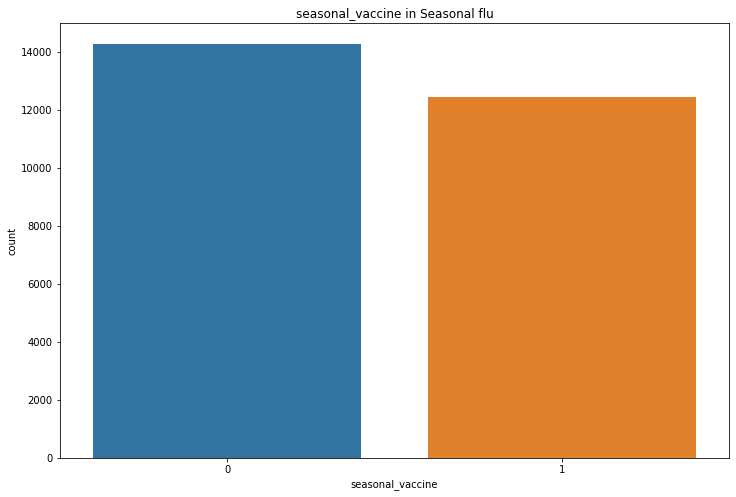

In [172]:
countplot('seasonal_vaccine','seasonal')

In [173]:
value_counts('seasonal_vaccine')

0    0.534392
1    0.465608
Name: seasonal_vaccine, dtype: float64

### most people(53%) did not receive the seasonal flu vaccine

## 4.One hot Encoding for categorical variables

In [174]:
#categorical data
categoricals = training.select_dtypes(include='object')
#numeric data
numerics = training.drop(categoricals.columns,axis=1)

#one hot encoding 
ohe = OneHotEncoder(drop='first',sparse_output=False)
train_encoded = pd.DataFrame(ohe.fit_transform(categoricals),columns=ohe.get_feature_names_out(categoricals.columns),index=categoricals.index)

#combine encoded values with numerics columns
train_encoded = pd.concat([numerics,train_encoded],axis=1)

## 5. Feature Selection

In [175]:
#predictor variables
X =  train_encoded.drop(['h1n1_vaccine','seasonal_vaccine','respondent_id'],axis=1)
#target variables
y_h1n1 = train_encoded['h1n1_vaccine']
y_seasonal = train_encoded['seasonal_vaccine']
selector = SelectKBest(f_classif, k=20)
X_new_h1n1 = selector.fit_transform(X,y_h1n1)
X_new_seasonal = selector.fit_transform(X,y_seasonal)


### 6.Modelling

In [177]:
#use logistic regression since this is a binary prediction
logreg = LogisticRegression(fit_intercept=False,C=1e12,solver='liblinear')

#split data for modelling
X_train,X_test,y_train,y_test =  train_test_split(X,y_h1n1,test_size=0.3,random_state=42)

#train for h1n1 vaccine
model_log_h1n1 = logreg.fit(X,y_h1n1)
model_log_h1n1

#train for seasonal vaccine
# model_log_seasonal = logreg.fit(X_new_seasonal,y_train_seasonal)
# model_log_seasonal

LogisticRegression(C=1000000000000.0, fit_intercept=False, solver='liblinear')

In [ ]:
x_

### a)Clean and encode test data

In [1240]:
null_percentage = (test_data.isna().sum()/test_data.shape[0]) * 100
#identify columns with 50 + null values
columns_to_drop = null_percentage[null_percentage>49.9].index
print(f'columns_to_drop: {columns_to_drop}')
#Drop those columns from the dataframe
test_data.drop(columns=columns_to_drop,inplace=True)
#check missing values again
((test_data.isna().sum()/test_data.shape[0]) * 100).sort_values(ascending=False)

#fill numerics with median and categorical with mode
for column in test_data.columns:
    if test_data[column].dtype=='object':
        test_data[column].fillna(test_data[column].mode()[0],inplace=True)
    elif test_data[column].dtype =='float64':
        test_data[column].fillna(test_data[column].median(),inplace=True)

test_data.drop(columns=['hhs_geo_region','household_children','household_adults','employment_industry'],inplace=True)
test_data.replace('Not in Labor Force','Unemployed',inplace=True)

#categorical data
categoricals_test = test_data.select_dtypes(include='object')
#numeric data
numerics_test = test_data.drop(categoricals.columns,axis=1)

#one hot encoding 
ohe = OneHotEncoder(drop='first',sparse_output=False)
test_encoded = pd.DataFrame(ohe.fit_transform(categoricals_test),columns=ohe.get_feature_names_out(categoricals_test.columns),index=categoricals_test.index)

#combine encoded values with numerics columns
test_encoded = pd.concat([numerics_test,test_encoded],axis=1)

X_test =  test_encoded.drop('respondent_id',axis=1)
# #target variables
# y_test = training_label['h1n1_vaccine']
X_new_test = selector.transform(X_test)

columns_to_drop: Index(['employment_occupation'], dtype='object')


### b) Predict test data

In [178]:
y_predcited_h1n1 = model_log_h1n1.predict(X_test)
# y_predcited_seasonal = model_log_seasonal.predict(X_new_test)

### c)Evaluate Model performance

<Axes: >

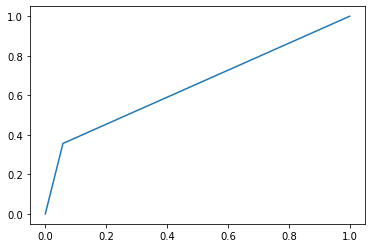

In [ ]:
y_score_h1n1 = model_log_h1n1.decision_function(X_test)
fpr,tpr,threshhold = roc_curve(y_test,y_predcited_h1n1)
fpr,tpr,threshhold = roc_curve(y_test,y_score_h1n1)
sns.lineplot(x=fpr,y=tpr)   

In [182]:
# y_score_seasonal = model_log_seasonal.decision_function(X_new_test)
# fpr,tpr,threshhold = roc_curve(y_predcited_seasonal,y_score_seasonal)
# sns.lineplot(x=fpr,y=tpr)   
fpr,tpr,threshhold = roc_curve(y_test,y_score_h1n1)
auc(fpr,tpr)

0.7818976725988767